In [2]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt

# Tout d'abord, on télécharge le fichier CIF du matériau qui nous a été attribué

with MPRester("6gQTbf2KhBi8mC40") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-9166")
    new_s = SpacegroupAnalyzer(structure).get_primitive_standard_structure()
    w = CifWriter(new_s)
    CIF = w.write_file('MgCN2.cif')

In [3]:
# Ensuite, on fait appel à la classe XRDCalculator, qui calcul les figures 
# de diffraction sous rayons X d'une structure cristalline (ici un rayonnement X 
# incident Cu Kα de longueur d’onde λ=1.54060 Å).
# Le résultat donne l'ensemble des valeurs d'intensité et d'angle 2 theta dont seulement
# les trois premiers nous intéressent.

new_s = SpacegroupAnalyzer(structure).get_primitive_standard_structure()
c = XRDCalculator(wavelength='CuKa1', symprec=0, debye_waller_factors=None)
xrd = c.get_pattern(new_s)

# L'ensemble des résultats 
print(xrd)

# Dont on garde les 3 premiers
print(xrd.x[:3])
print(xrd.y[:3])

DiffractionPattern
$2\Theta$: [18.71515301 31.88159155 33.7451564  37.95427723 40.44604769 44.91600513
 55.44870406 55.5942974  58.39036891 59.19121401 61.37861058 66.63634148
 69.29533955 70.96981093 74.14571657 74.48317133 81.14077638 81.7120868
 82.40366651 84.88366912 87.47423076]
Intensity: [1.49154203e+01 4.04492080e+00 1.00000000e+02 9.60832763e-01
 1.08587432e+01 2.70715992e+01 1.11890470e+01 2.97620777e+01
 4.60596020e-01 5.36556400e+00 4.84682702e+00 9.76762379e+00
 1.75110892e+00 2.12223994e+00 4.75705242e+00 8.08659373e+00
 2.60599156e+00 2.57848852e-03 2.91218874e+00 9.57358488e-01
 1.70866200e+00]
[18.71515301 31.88159155 33.7451564 ]
[ 14.91542035   4.0449208  100.        ]


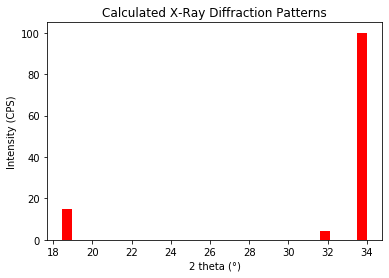

In [4]:
from matplotlib import pyplot as plt

x = xrd.x[:3]
y = xrd.y[:3]
largeur = 0.5

fig = plt.figure()
plt.bar(x, y, largeur, color='r' )
plt.title("Calculated X-Ray Diffraction Patterns")
plt.xlabel('2 theta (°)')
plt.ylabel('Intensity (CPS)')
plt.show()

In [5]:
# Les 3 premiers pics sont repris sur le graphe ci-dessus

# PREMIER PIC
# La valeur d'intensité du premier pic est:
int_pic_1 = xrd.y[0]
print("Intensité du premier pic: ", int_pic_1, "CPS")

# Elle correspond à un angle 2 theta (en degré) de:
angle_pic_1 = xrd.x[0]
print("Valeur 2 theta du premier pic: ", angle_pic_1, "°")

# Et les indices hkl correspondant sont:
hkl_pic_1 = xrd.hkls[0]
print("Indices hkl correspondant au premier pic: ", hkl_pic_1)

Intensité du premier pic:  14.915420349791283 CPS
Valeur 2 theta du premier pic:  18.715153013108136 °
Indices hkl correspondant au premier pic:  [{'hkl': (1, 1, 1), 'multiplicity': 2}]


In [6]:
# DEUXIEME PIC
# La valeur d'intensité du second pic est:
int_pic_2 = xrd.y[1]
print("Intensité du second pic: ", int_pic_2, "CPS")

# Elle correspond à un angle 2 theta (en degré) de:
angle_pic_2 = xrd.x[1]
print("Valeur 2 theta du second pic: ", angle_pic_2, "°")

# Et les indices hkl correspondant sont:
hkl_pic_2 = xrd.hkls[1]
print("Indices hkl correspondant au second pic: ", hkl_pic_2)

Intensité du second pic:  4.044920801248306 CPS
Valeur 2 theta du second pic:  31.881591553148244 °
Indices hkl correspondant au second pic:  [{'hkl': (1, 0, 0), 'multiplicity': 6}]


In [7]:
# TROISIEME PIC
# La valeur d'intensité du troisième pic est:
int_pic_3 = xrd.y[2]
print("Intensité du troisième pic: ", int_pic_3, "CPS")

# Elle correspond à un angle 2 theta (en degré) de:
angle_pic_3 = xrd.x[2]
print("Valeur 2 theta du troisième pic: ", angle_pic_3, "°")

# Et les indices hkl correspondant sont:
hkl_pic_3 = xrd.hkls[2]
print("Indices hkl correspondant au troisième pic: ", hkl_pic_3)

Intensité du troisième pic:  100.0 CPS
Valeur 2 theta du troisième pic:  33.74515640317973 °
Indices hkl correspondant au troisième pic:  [{'hkl': (1, 1, 0), 'multiplicity': 6}]


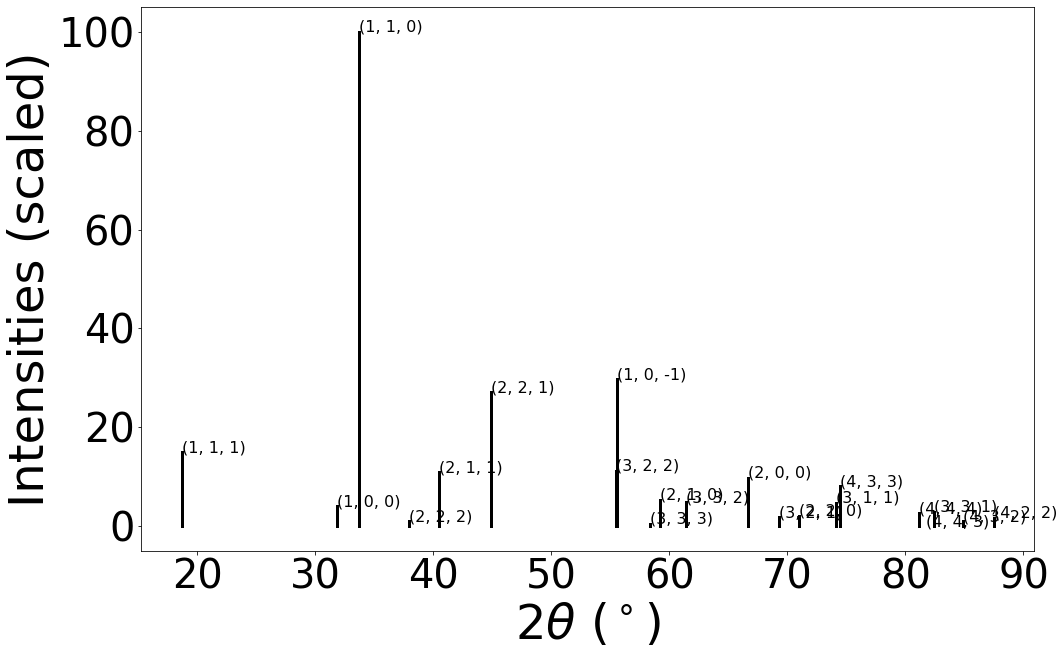

In [8]:
# Pour avoir une représentation des différentes raies de diffraction avec les valeurs hkl associée (j'ai mis ce graphe à la fin 
# car je le trouve moins clair que le premier).

c.show_plot(new_s)